In [2]:
import numpy as np
import pandas as pd
import string
from matplotlib import pyplot as plt
from PIL import Image
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import copy

In [3]:
#Reading CSV File


img_height = 30
img_width= 40


csv_path = "C:/Users/Bhanu Agrawal/Documents/GitHub/Handwriting-Recognition/English Handwritten Characters - Dhruvil Dave/english.csv"
img_folder = "C:/Users/Bhanu Agrawal/Documents/GitHub/Handwriting-Recognition/English Handwritten Characters - Dhruvil Dave/"

df = pd.read_csv(csv_path)

print(df)


                   image label
0     Img/img001-001.png     0
1     Img/img001-002.png     0
2     Img/img001-003.png     0
3     Img/img001-004.png     0
4     Img/img001-005.png     0
...                  ...   ...
3405  Img/img062-051.png     z
3406  Img/img062-052.png     z
3407  Img/img062-053.png     z
3408  Img/img062-054.png     z
3409  Img/img062-055.png     z

[3410 rows x 2 columns]


In [4]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  #Shuffle CSV dataframe

split = int(len(df)*0.8)

train_df = df[:split]
test_df = df[split:]

print(train_df)
print(test_df)

                   image label
0     Img/img058-001.png     v
1     Img/img033-030.png     W
2     Img/img004-006.png     3
3     Img/img013-021.png     C
4     Img/img051-054.png     o
...                  ...   ...
2723  Img/img039-016.png     c
2724  Img/img003-024.png     2
2725  Img/img021-041.png     K
2726  Img/img017-054.png     G
2727  Img/img017-049.png     G

[2728 rows x 2 columns]
                   image label
2728  Img/img015-054.png     E
2729  Img/img028-047.png     R
2730  Img/img023-005.png     M
2731  Img/img010-010.png     9
2732  Img/img062-016.png     z
...                  ...   ...
3405  Img/img020-051.png     J
3406  Img/img021-031.png     K
3407  Img/img024-030.png     N
3408  Img/img016-036.png     F
3409  Img/img058-040.png     v

[682 rows x 2 columns]


In [5]:
def load_images(dataframes):

    X_data = []
    Y_data = []


    for _,row in dataframes.iterrows():
        label = row["label"]
        img_path = os.path.join(img_folder, row["image"])

        img =  Image.open(img_path).convert("L")  #Convert to grayscale

        img = img.resize((img_width, img_height), Image.LANCZOS)

        img_array = np.array(img)

        X_data.append(img_array)
        Y_data.append(label)

    return np.array(X_data), np.array(Y_data).reshape(1,-1)


In [6]:
train_set_x_orig, train_set_y = load_images(train_df)
test_set_x_orig, test_set_y = load_images(test_df)

classes = np.unique(df["label"])

In [7]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
num_py = train_set_x_orig.shape[2]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height of each image: num_px = " + str(num_px))
print ("Width of each image: num_py = " + str(num_py))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_py) + ", 1)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 2728
Number of testing examples: m_test = 682
Height of each image: num_px = 30
Width of each image: num_py = 40
Each image is of size: (30, 40, 1)
train_set_x shape: (2728, 30, 40)
train_set_y shape: (1, 2728)
test_set_x shape: (682, 30, 40)
test_set_y shape: (1, 682)


y = ['Y']


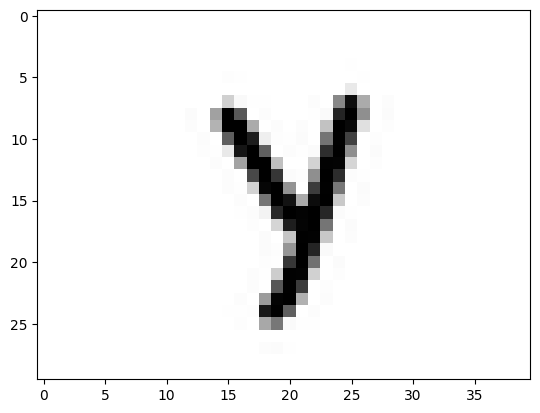

In [8]:
# Example of a picture
index = 2048            #0-208
plt.imshow(train_set_x_orig[index], cmap="gray")
print ("y = " + str(train_set_y[:, index]))

In [9]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (2728, 1200)
train_set_y shape: (1, 2728)
test_set_x_flatten shape: (682, 1200)
test_set_y shape: (1, 682)


In [10]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [11]:
model = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='multinomial')
model.fit(train_set_x, train_set_y.ravel())


y_pred = model.predict(test_set_x)
accuracy = accuracy_score(test_set_y.ravel(), y_pred)
print("Test Accuracy:", accuracy)

c:\Users\Bhanu Agrawal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Accuracy: 0.3152492668621701


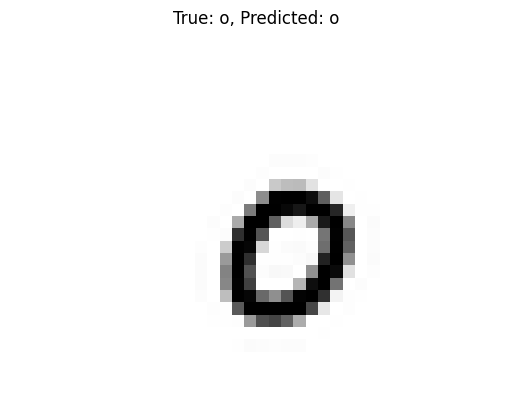

In [12]:
# Pick a test sample index that was misclassified
index = 105  # Change this to check different test images
test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T / 255.
# Reshape the image correctly
image = test_set_x[:, index].reshape((img_height, img_width))  # Shape should match the resized image

# Get true label and predicted label
true_label = test_set_y[0, index]  
predicted_label = y_pred[index]  

# Plot the misclassified image
plt.imshow(image, cmap="gray")
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis("off")
plt.show()
